# Unsupervised Learning - Part 3


## 1. DATA:

#### Necessary libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Necessary Libraries for Machine Learning and PCA

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

##  Loading Dataset

In [3]:
data = pd.read_csv('Part3 - vehicle.csv')
data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

Preserving original Dataset by making a copy of **Data**

In [4]:
df = data.copy(deep= True)

In [5]:
rows,column = df.shape
print('The datset contains',rows,'rows and',column,'columns.')

The datset contains 846 rows and 19 columns.


In [6]:
print('The datatype of each attribute: \n')
df.info()

The datatype of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 

Checking for any duplicate values

In [9]:
print('Duplicate rows:',df[df.duplicated()].shape[0])

Duplicate rows: 0


Checking for null values in each column:

In [10]:
print('Null values:\n',df.isnull().sum())

Null values:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [11]:
for cols in df.columns:
    if(cols != 'class'):
        df[cols] = df[cols].fillna(df[cols].median())   #Filling null values with median values of each column

## 2. EDA and Visualisation:

### Descriptive statistics:

In [12]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Univariate analysis:

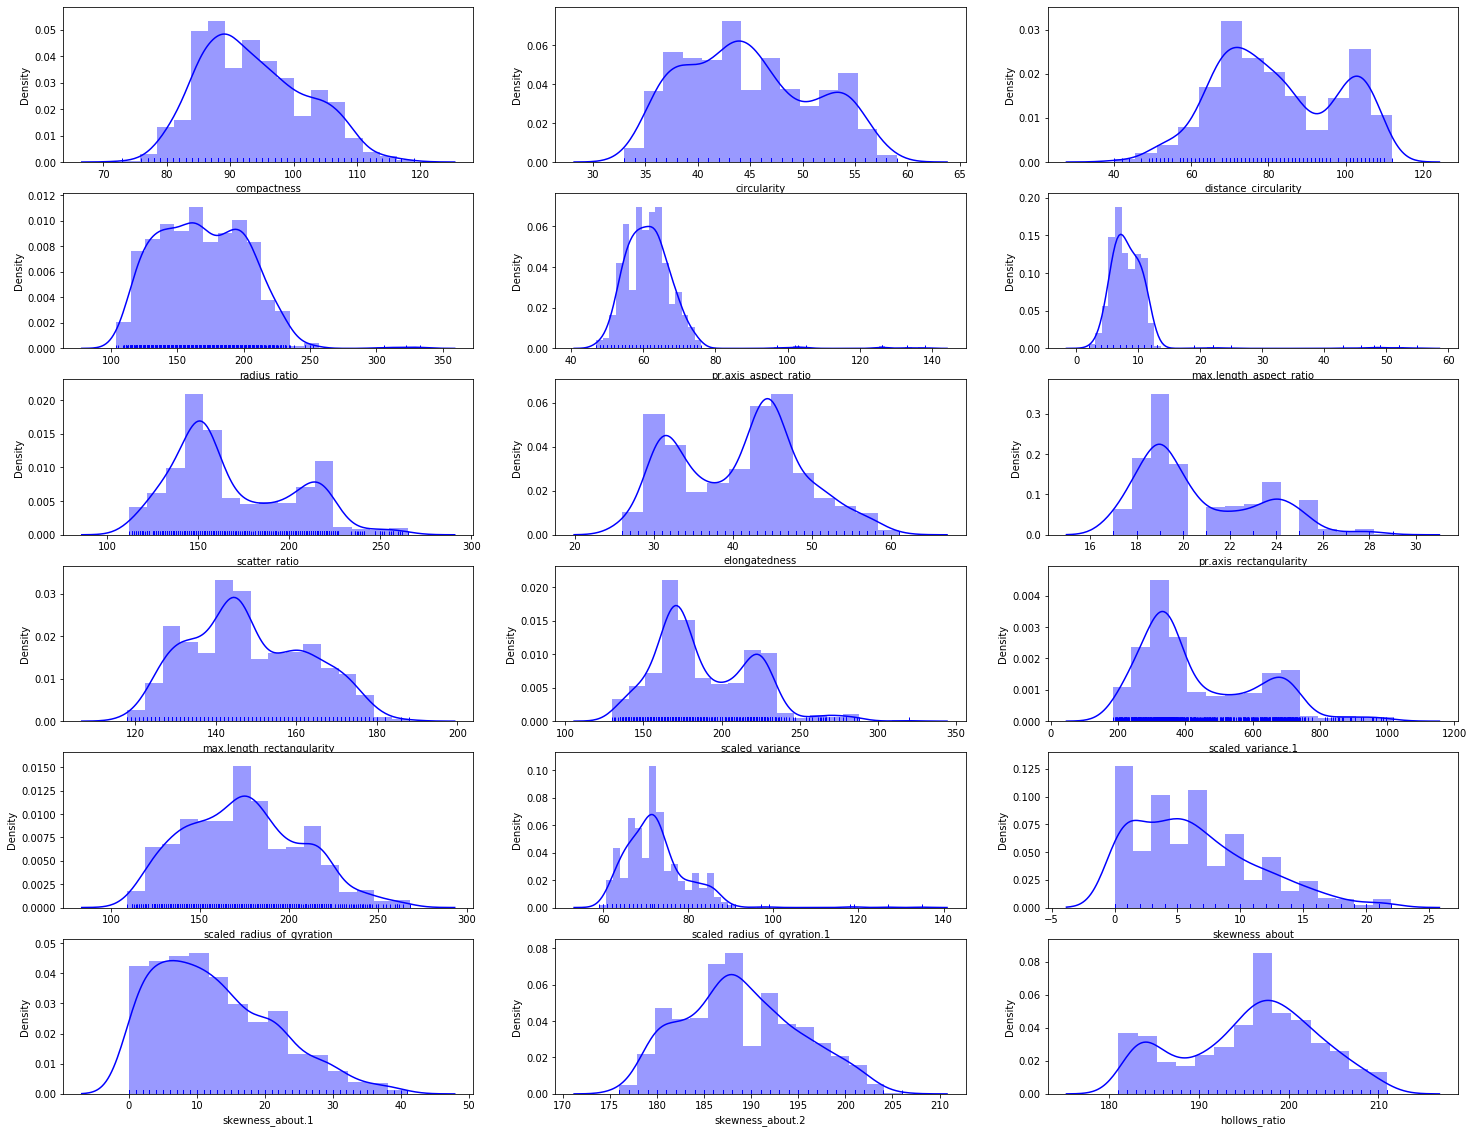

In [13]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1 

#### Inference:
* Columns have data distributed across multiple scales.
* Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness)
* Column skweness_about, skewness_about.1 have data that is right skewed whereas for column skewness_about.2 data is nearly normally distributed.
* Some columns have long right tail (eg.: pr.axis_aspect_ratio) as evident from the above distplot it is highly likely that they have outliers.

##### Target column visualisation:

car    429
bus    218
van    199
Name: class, dtype: int64


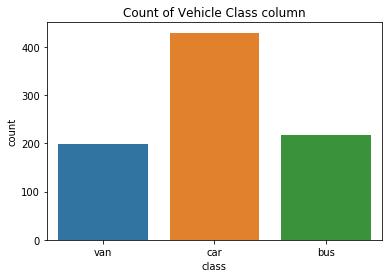

In [14]:
print(df['class'].value_counts())
plt.title('Count of Vehicle Class column')
sns.countplot(x = 'class', data = df)

### Inference:
* Three classes are observed with some imbalance in the dataset.

#### Outlier treatment and Visualisation 

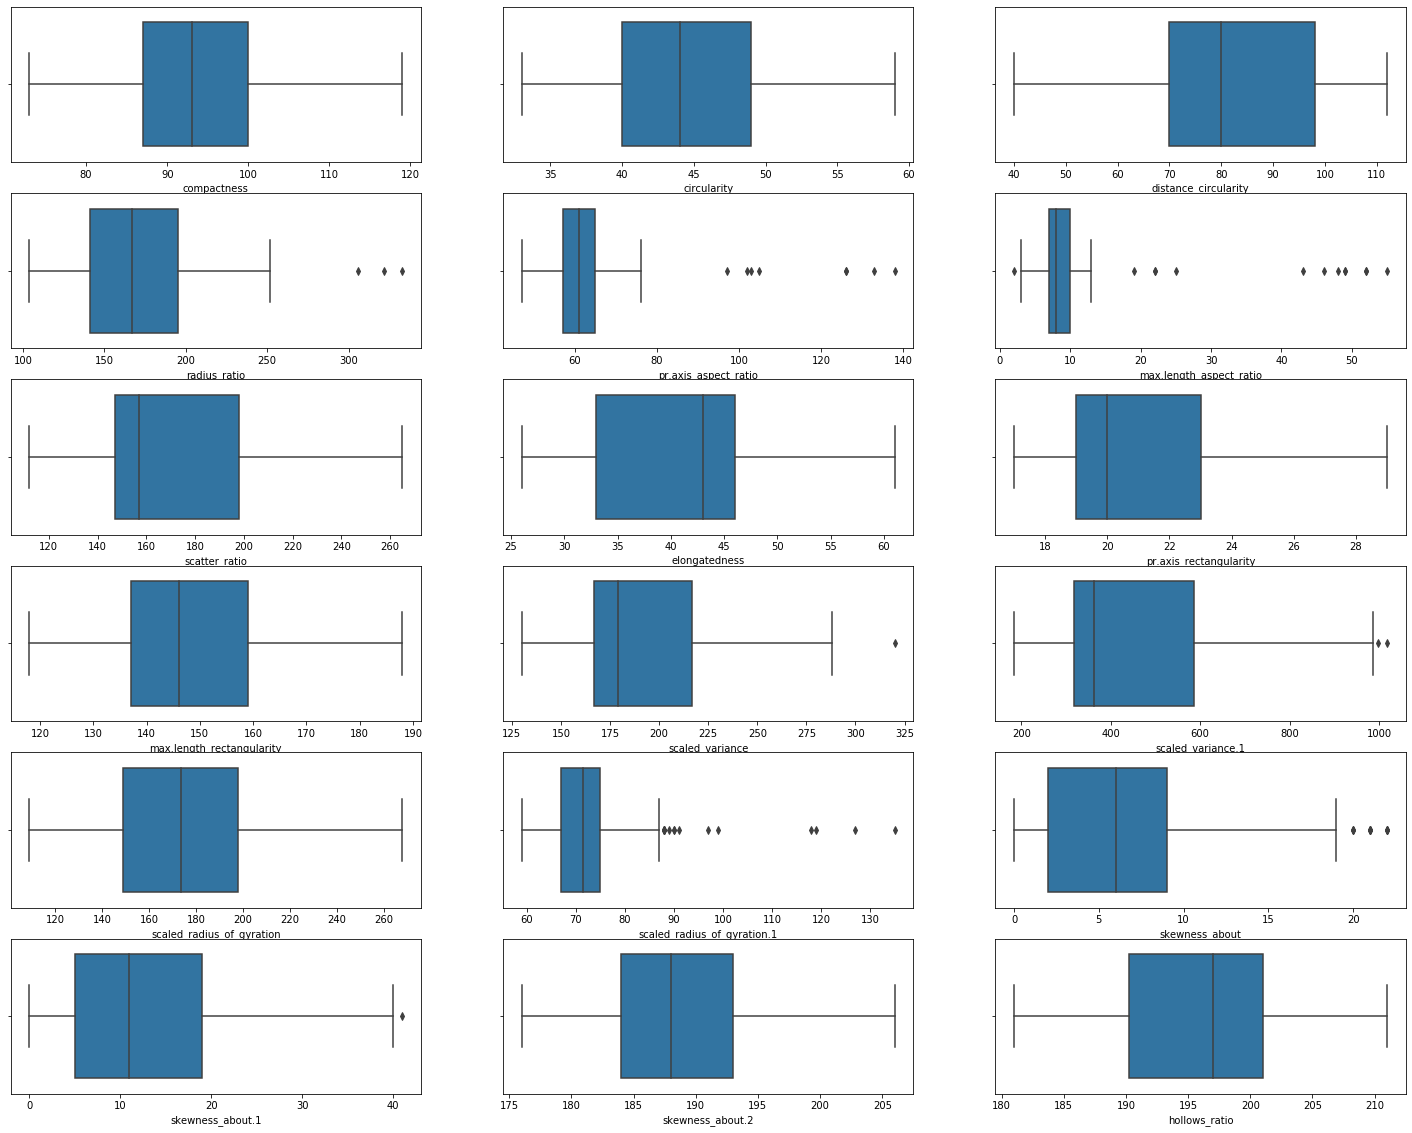

In [15]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i])
    col += 1 

### Inference:
* from above it is observed that the following 8 columns have outliers:
 - **radius_ratio**
 - **pr.axis_aspect_ratio**
 - **max.length_aspect_ratio**
 - **scaled_variance**
 - **scaled_variance.1**
 - **scaled_radius_of_gyration**
 - **skewness_about**
 - **skewness_about.1**
* For more understanding Individual boxplots are required. 

Text(0.5, 1.0, 'Boxplot of Scaled Variance Column')

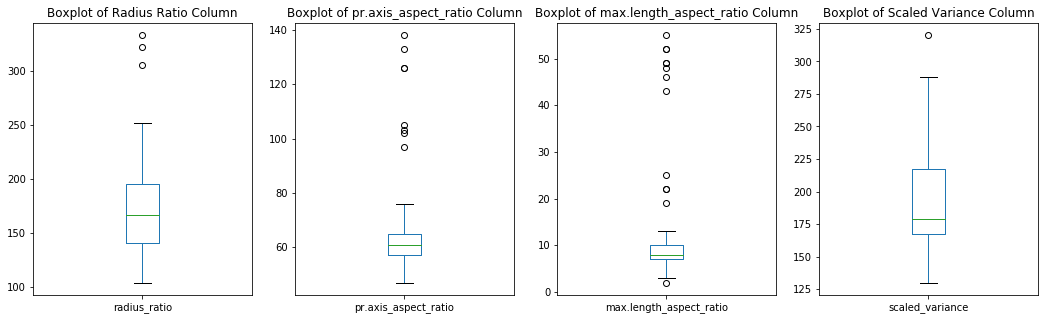

In [22]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 4, 1)
df.radius_ratio.plot(x = 'radius_ratio', kind = 'box')
plt.title('Boxplot of Radius Ratio Column')

plt.subplot(1, 4, 2)
df['pr.axis_aspect_ratio'].plot(x = 'pr.axis_aspect_ratio', kind = 'box')
plt.title('Boxplot of pr.axis_aspect_ratio Column')

plt.subplot(1, 4, 3)
df['max.length_aspect_ratio'].plot(x = 'max.length_aspect_ratio', kind = 'box')
plt.title('Boxplot of max.length_aspect_ratio Column')

plt.subplot(1, 4, 4)
df.scaled_variance.plot(x = 'scaled_variance', kind = 'box')
plt.title('Boxplot of Scaled Variance Column')




#### Inference:
* columns **pr.axis_aspect_ratio** and **max.length_aspect_ratio** has the most number of outliers among the four columns

Text(0.5, 1.0, 'Boxplot of Skewness About 1 Column')

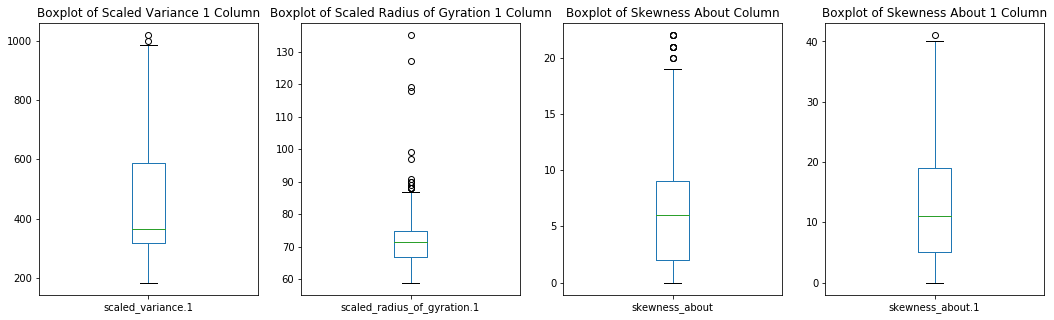

In [24]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 4, 1)
df['scaled_variance.1'].plot(x = 'scaled_variance.1', kind = 'box')
plt.title('Boxplot of Scaled Variance 1 Column')

plt.subplot(1, 4, 2)
df['scaled_radius_of_gyration.1'].plot(x = 'scaled_radius_of_gyration.1', kind = 'box')
plt.title('Boxplot of Scaled Radius of Gyration 1 Column')

plt.subplot(1, 4, 3)
df.skewness_about.plot(x = 'skewness_about', kind = 'box')
plt.title('Boxplot of Skewness About Column')

plt.subplot(1, 4, 4)
df['skewness_about.1'].plot(x = 'skewness_about.1 ', kind = 'box')
plt.title('Boxplot of Skewness About 1 Column')

#### Inference:
* Columns **scaled_radius_of_gyration.1** has the msot number of outliers among the four above mentioned columns.

##### Outlier treatment:

In [30]:
#finds the outliers and replace them by median
for col_name in df.drop(columns = 'class').columns:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

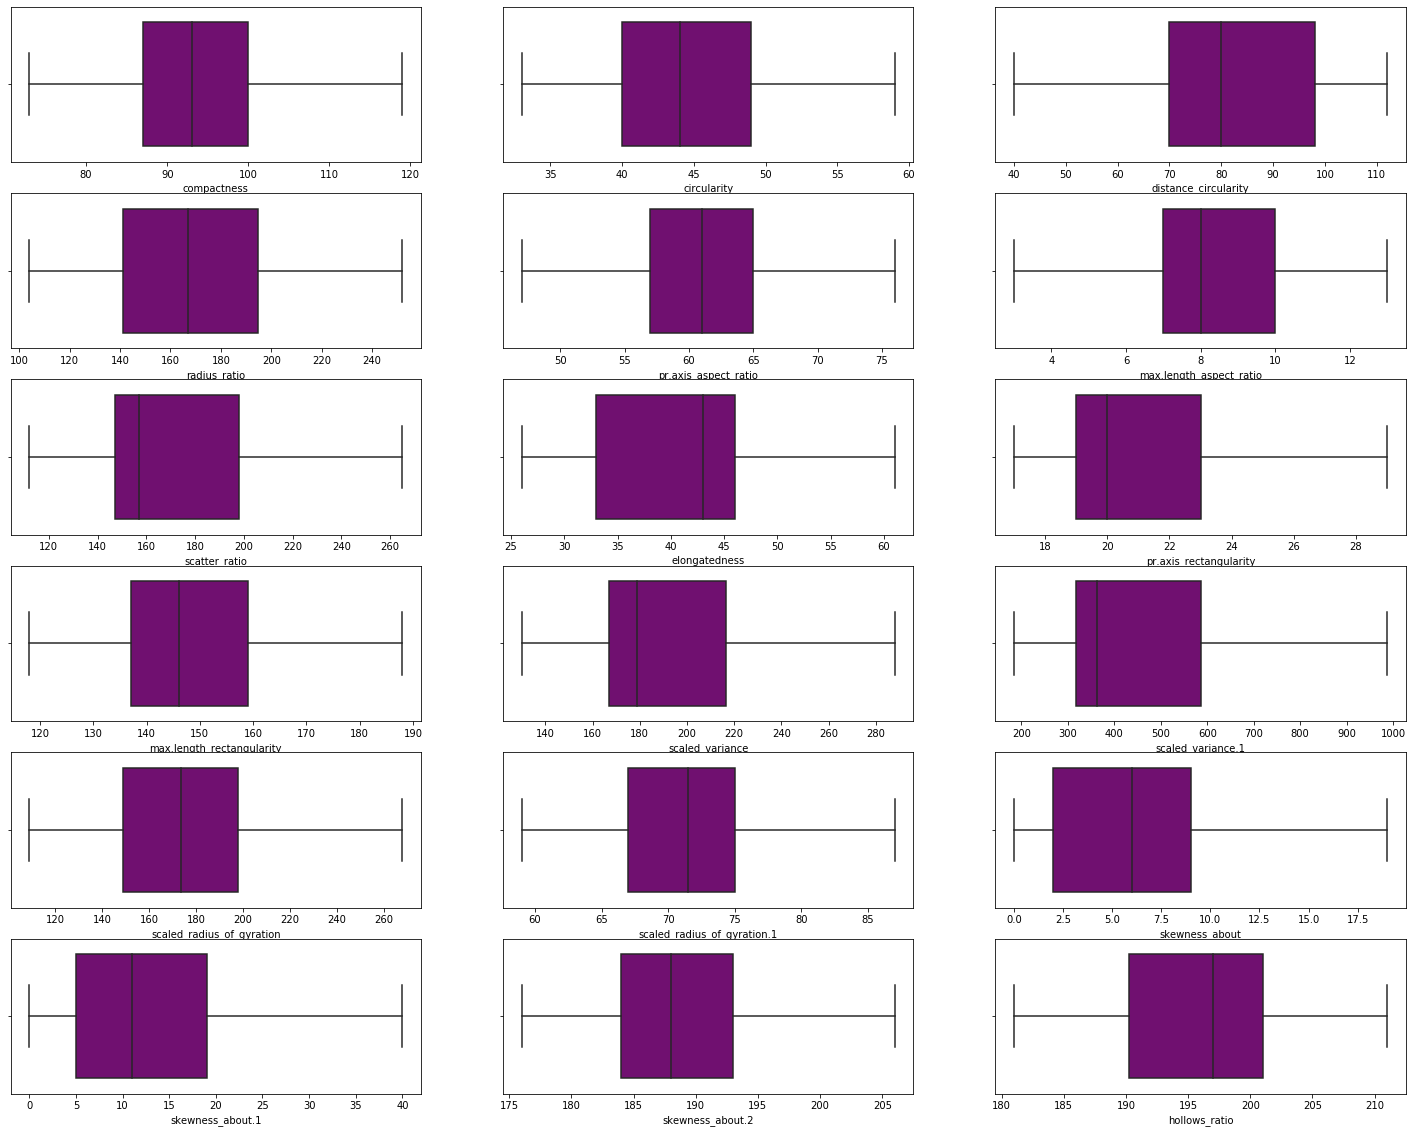

In [84]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i],color='purple')
    col += 1 

All the outliers are successfully tackled by replaceing the outlier values with median values of each attribute.

### Bi-variate analysis:

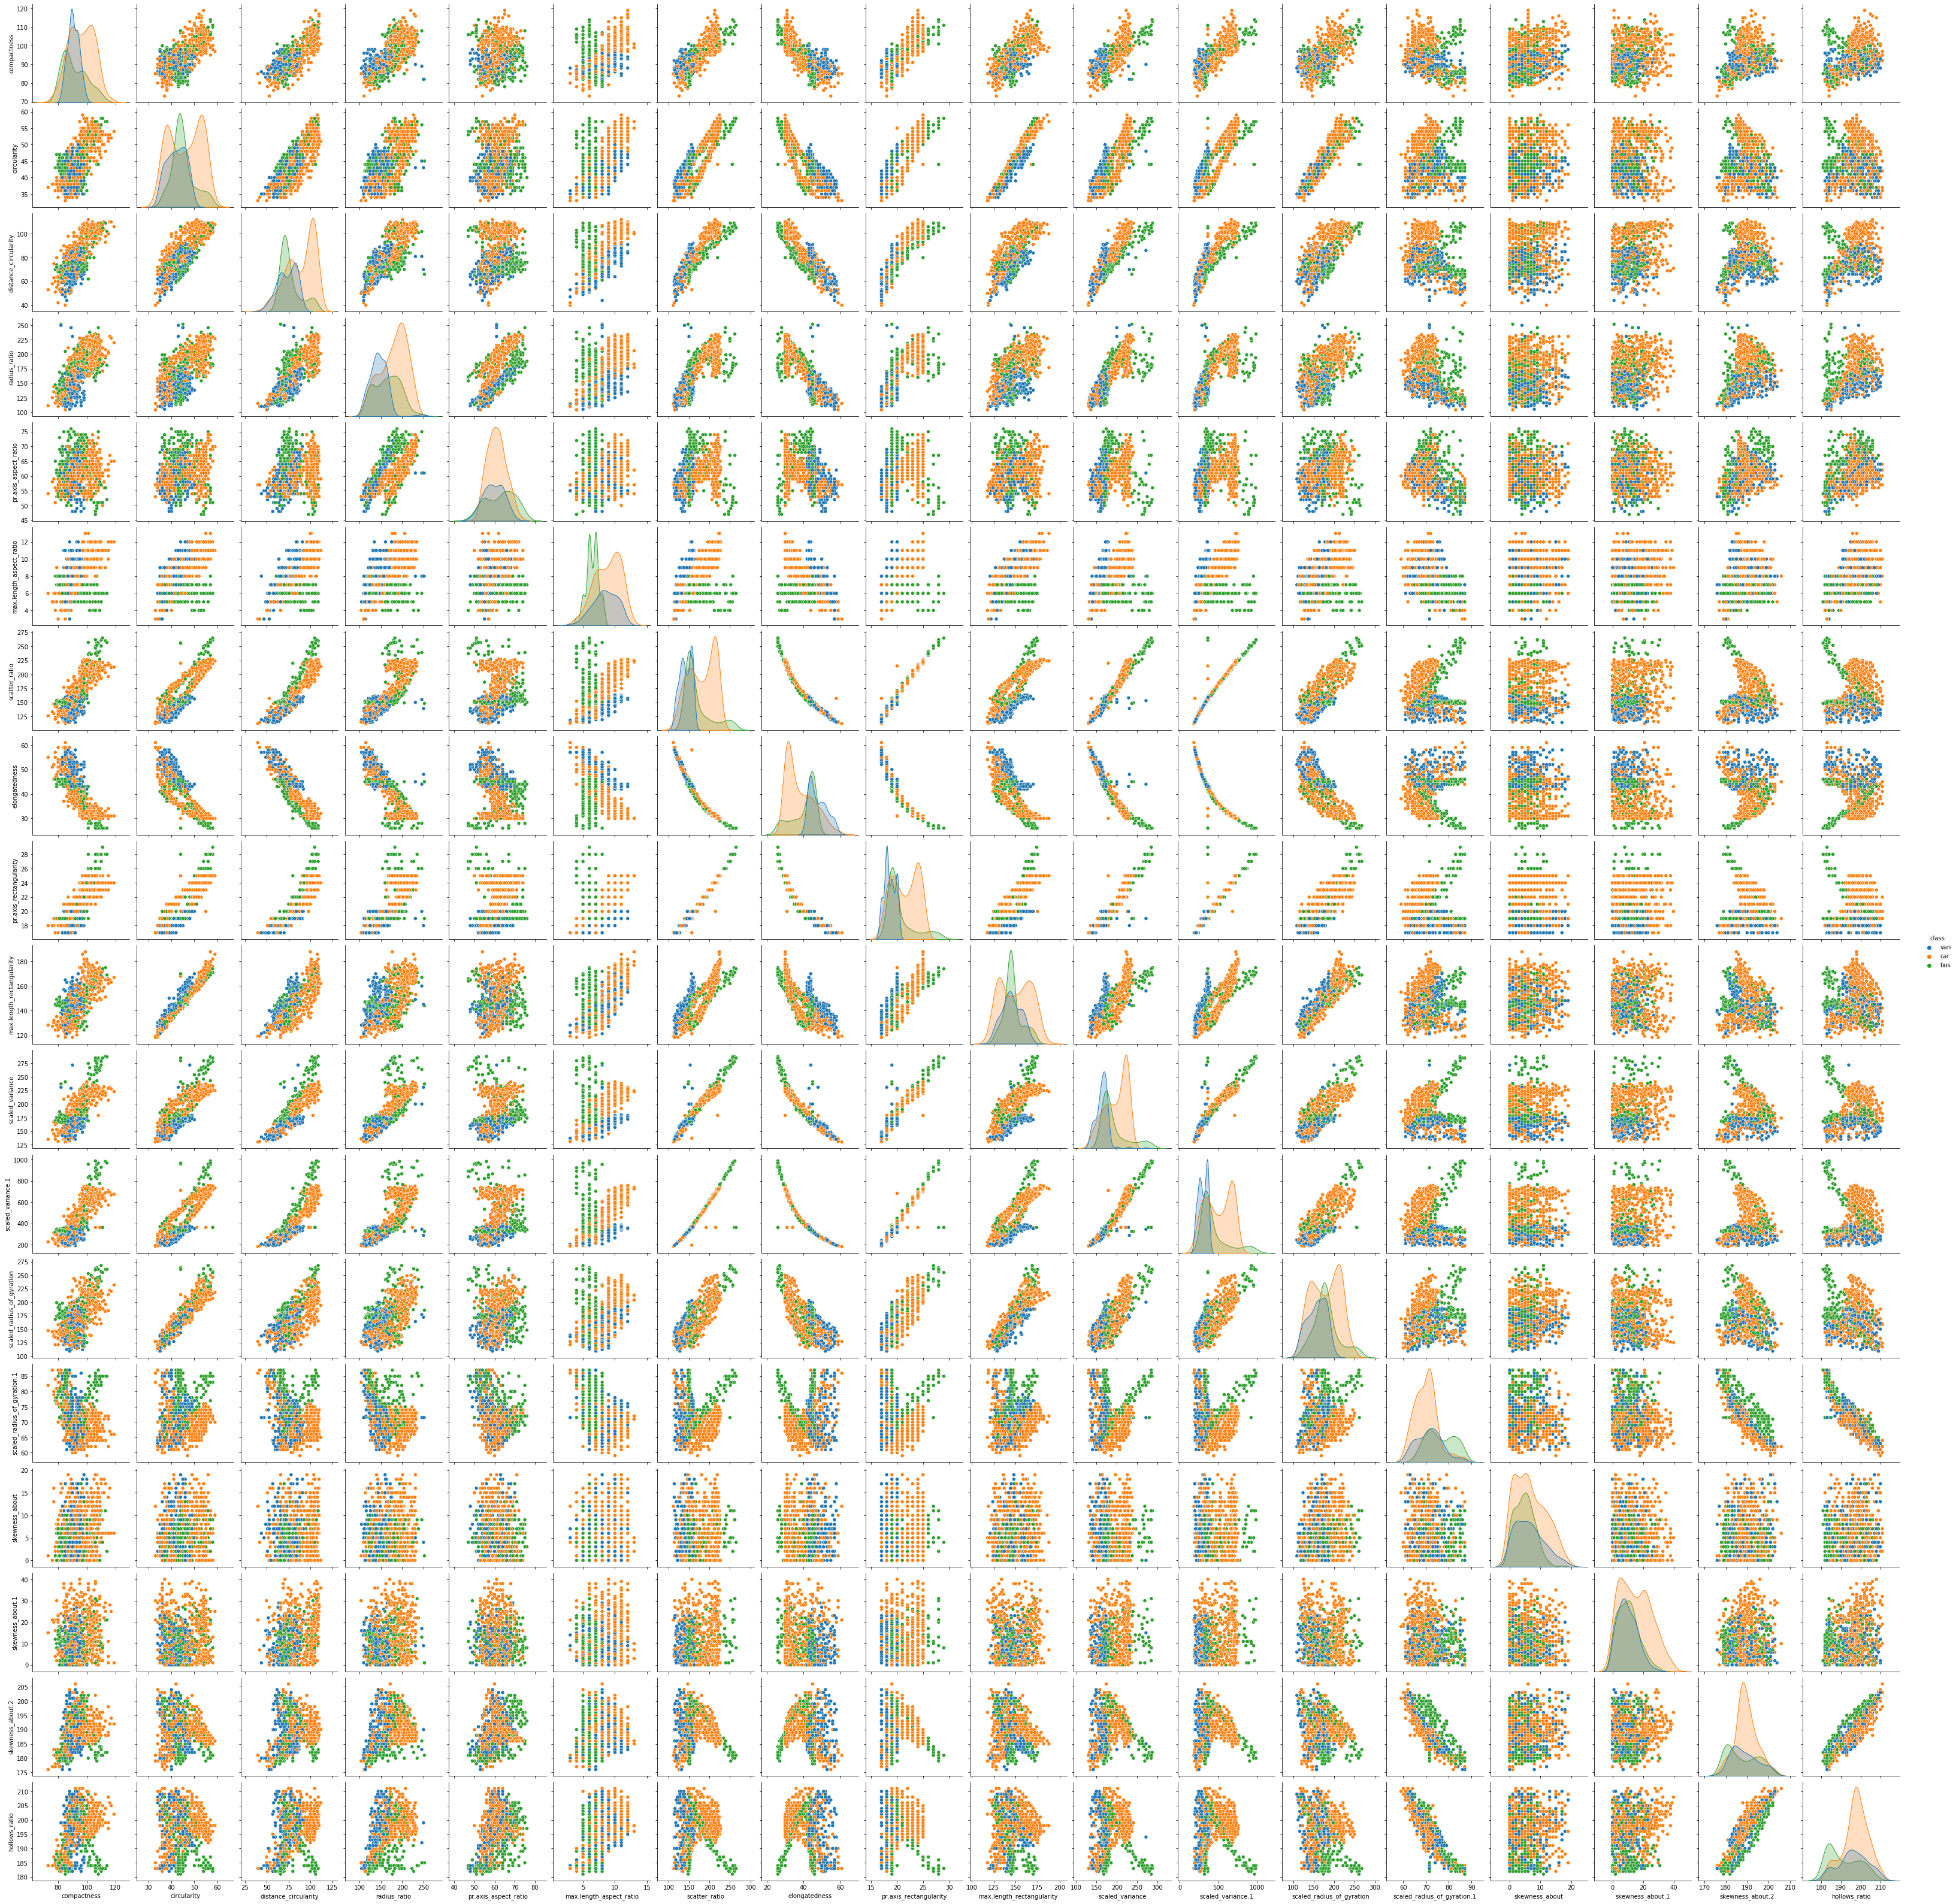

In [32]:
sns.pairplot(df,diag_kind = 'kde',hue = 'class')  #Plotting pairwise relationships in the dataset.

#### Inference:
* **skewness_about**, **skewness_about.1** and **skewness_about.2** show no correlation with anyother attribute.
* More can be visualised with a df.corr() function.

In [34]:
correlation = df.corr()          #Compute pairwise correlation of columns, excluding NA/null values
correlation

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                              0.081898       0.064242   
skewness_about.1                            0.141664       0.211647   
skewness_about.2                            0.

### Inference:
* **scaled_variance** & **scaled_variance.1** seems to be strongly correlated with value of 0.94
* **skewness_about.2** and **hollows_ratio** seems to be strongly correlated, corr coeff: 0.89
* **distance_circularity** and **radius_ratio** seems to have a high positive correlation with correlation coefficient of : 0.79
* **compactness** & **circularity** , **radius_ratio** & **pr.axis_aspect_ratio** also seems averagely correlated with correlation coeff: 0.66
* **scaled _variance** and **scaled_radius_of_gyration**, **circularity** & **distance_circularity** also seems to be highly correlated with correlation coefficient: 0.78
* **pr.axis_rectangularity** and **max.length_rectangularity** also seems to be strongly correlated with correlation coefficient value: 0.81
* **scatter_ratio** and **elongatedness** seems to have a strong negative correlation value : 0.97
* **elongatedness** and **pr.axis_rectangularity** seems to have a strong negative correlation value: 0.95

#### visualising the correlation with the help of heatmap:

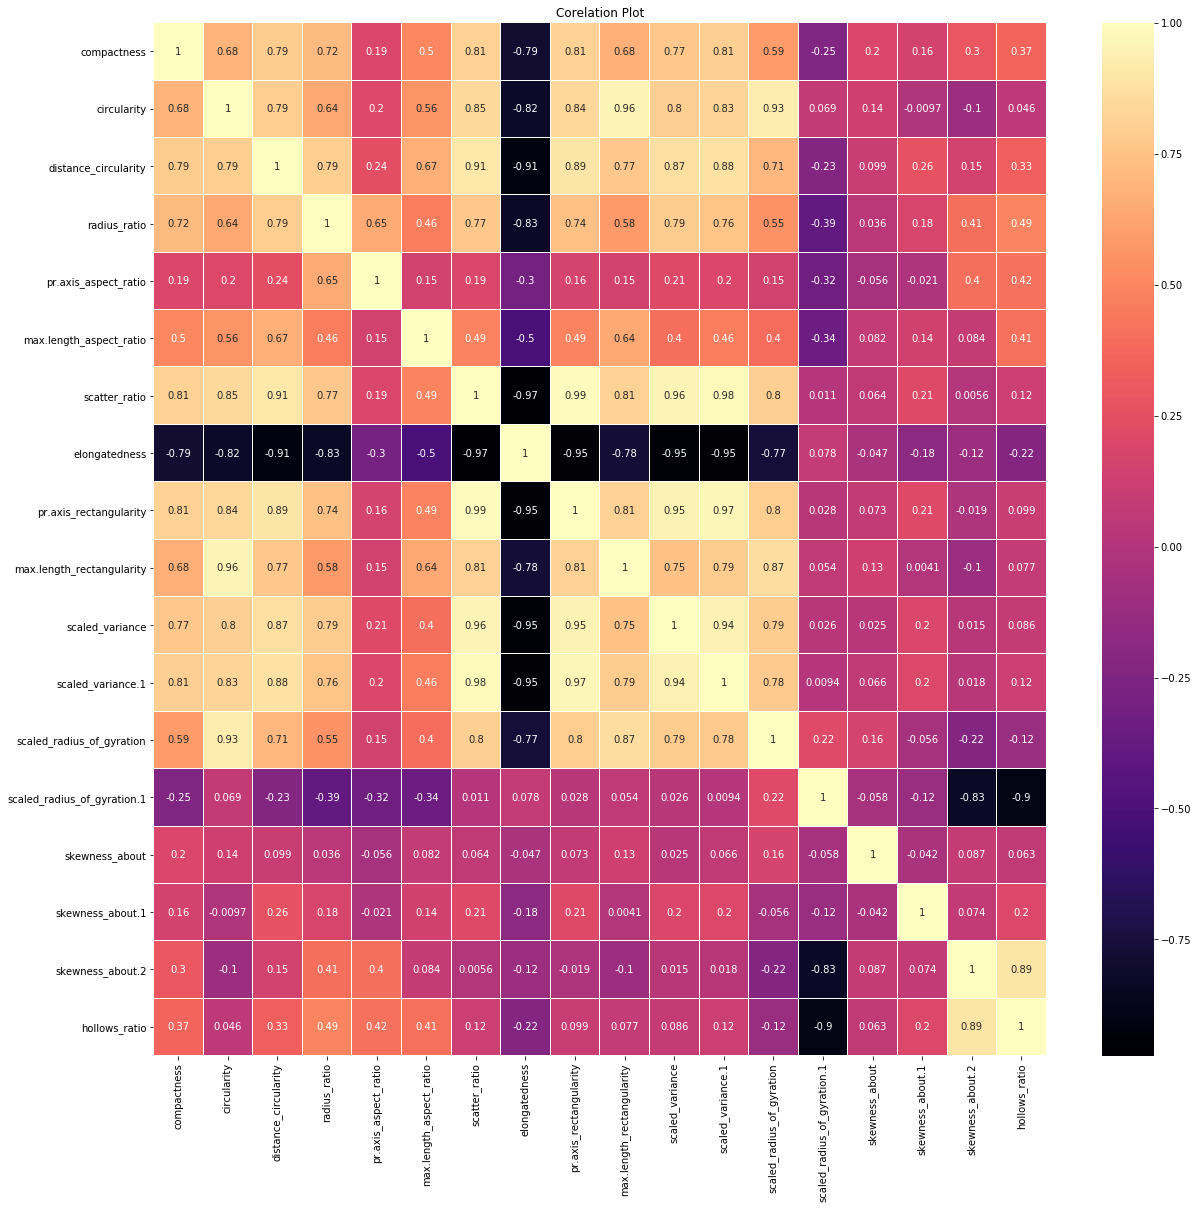

In [42]:
fig,ax = plt.subplots(figsize=(20,19))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.01,fmt='.2g',cmap="magma")  #Plot rectangular heatmap as a color-encoded matrix
bottom,top = ax.get_ylim()
plt.title("Corelation Plot")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Splitting the dependent and independent variables. The dependent variable (y) is further transformed into an encoded categorical column.

In [43]:
X = df.iloc[:,df.columns != 'class']
y = df['class'].astype('category').cat.codes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

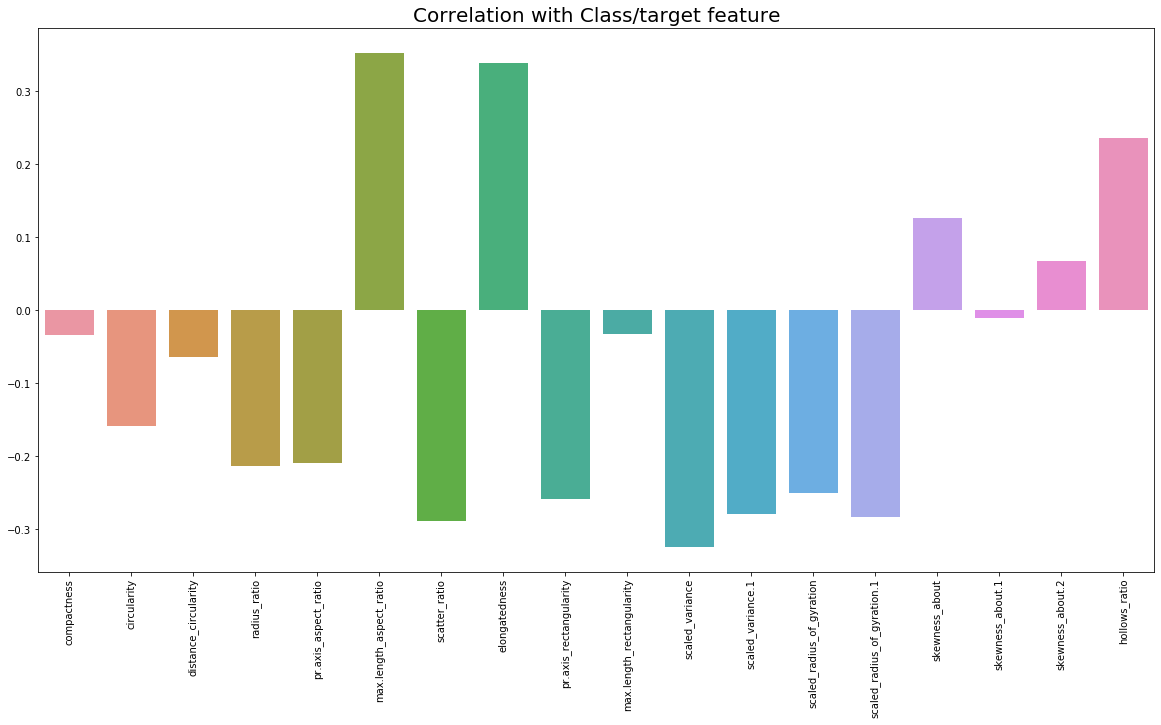

In [45]:
plt.figure(figsize = (20,10))
sns.barplot(x=X.columns,y=X.corrwith(y))
plt.title('Correlation with Class/target feature',fontsize=20)
plt.xticks(rotation=90)

#### Inference:
* columns **max.length_aspect_ratio** and **elongatedness** show high positive correlation compared to other features.
* Almost all the other columns show negative correlation with the target feature **Class**

### Scaling the dataset

In [46]:
X_col = X.columns
scaler = RobustScaler()      #Scale features using statistics that are robust to outliers
X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.153846     0.444444              0.107143      0.204651   
1    -0.153846    -0.333333              0.142857     -0.483721   
2     0.846154     0.666667              0.928571      0.781395   
3     0.000000    -0.333333              0.071429     -0.148837   
4    -0.615385     0.000000             -0.357143      0.706977   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 1.375                 0.666667       0.098039   
1                -0.500                 0.333333      -0.156863   
2                 0.625                 0.666667       0.980392   
3                 0.250                 0.333333      -0.254902   
4                 0.000                 0.000000      -0.156863   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.076923                    0.00                   0.590909   
1       0.153846                   -0.25                  -0.136364   
2      -0.846154                    0.75                   0.545455   
3       0.230769                   -0.25                  -0.136364   
4       0.153846                   -0.25                  -0.090909   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.060302           0.057890                   0.214286   
1        -0.180905          -0.125117                  -0.316327   
2         0.884422           1.014006                   0.948980   
3        -0.381910          -0.203548                  -0.948980   
4         1.246231          -0.143791                   0.295918   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.1875        0.000000          0.357143   
1                       0.0625        0.428571          0.214286   
2                       0.1875        1.142857         -0.142857   
3                      -1.0625        0.000000         -0.071429   
4                       0.0000        0.428571          0.000000   

   skewness_about.2  hollows_ratio  
0         -0.111111       0.000000  
1          0.111111       0.186047  
2          0.000000      -0.093023  
3          1.222222       0.930233  
4         -0.888889      -1.302326

 The decision boundary maximizes the distance to the nearest data points from different classes,Hence, the distance between data points affects the decision boundary SVM chooses. In other words, training an SVM over the scaled and non-scaled data leads to the generation of different models. So data scaling is ac rutial step in modelling SVM

## 3.Classifier - SVM on original dataset

#### Original dataset with scaling:

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [91]:
svcc = SVC()
svcc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### SVC model without PCA

SVC Model of dataset without PCA

Accuracy Score of Training Data:  0.9425675675675675

Accuracy Score of Test Data: 0.9448818897637795

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.97      0.93      0.95       125
           2       0.90      0.98      0.94        58

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.94      0.94       254


Mean Absolute Error of SVC:
 0.05905511811023622

Confusion Matrix of SVC:
 [[ 67   3   1]
 [  4 116   5]
 [  0   1  57]]


(3.0, 0.0)

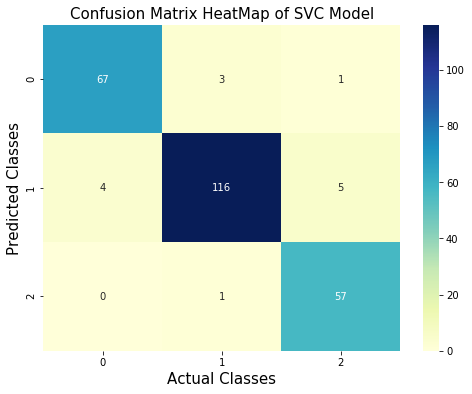

In [82]:
print('SVC Model of dataset without PCA')
# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

modeltrSVC_score = svc_model.score(X_train, y_train)
print('\nAccuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
fig = plt.figure(figsize = (8, 6))
ax  = sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [83]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score)

Precision Score : 0.94
Recall Score : 0.95
F1-Score : 0.94
Accuracy Score : 0.94


## 4.Dimensional reduction:

Text(0, 0.5, 'Percentage of Cumulative Explained Variance')

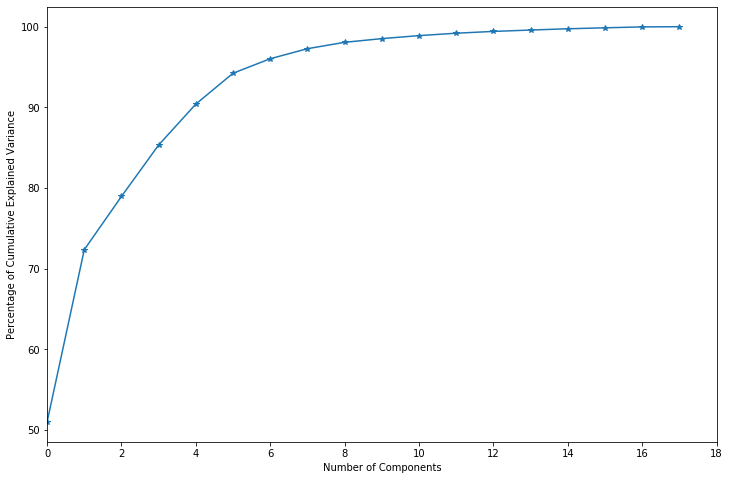

In [57]:
pca = PCA()

X_pca_ = pca.fit_transform(X_std)

plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = '*')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')

### Inference:
* The first 7 components explain almost **95%** of the variation.
* Between first 5 components, more than **90%** of the data is captured.
* Taking 95% variation, the rest of the components can be dropped.

In [60]:
print('Eigen Values: \n')
pca.explained_variance_

Eigen Values: 



array([3.96100935e+00, 1.65870806e+00, 5.13125294e-01, 4.94835514e-01,
       3.94116009e-01, 2.96614528e-01, 1.39542157e-01, 9.65854893e-02,
       6.14513508e-02, 3.54768843e-02, 2.88836973e-02, 2.31031113e-02,
       1.73160148e-02, 1.31973434e-02, 1.21370214e-02, 9.51277726e-03,
       8.47124019e-03, 2.15456314e-03])

In [62]:
print('The percentage of variation explained by each Eigen Vector: \n')
pca.explained_variance_ratio_

The percentage of variation explained by each Eigen Vector: 



array([5.10029196e-01, 2.13579284e-01, 6.60712607e-02, 6.37162241e-02,
       5.07473357e-02, 3.81928080e-02, 1.79677874e-02, 1.24365825e-02,
       7.91262536e-03, 4.56808990e-03, 3.71913510e-03, 2.97481279e-03,
       2.22965218e-03, 1.69932203e-03, 1.56279239e-03, 1.22488833e-03,
       1.09077749e-03, 2.77426790e-04])

PCA visualization how information is captured across components

Text(0.5, 0, 'Principal Components')

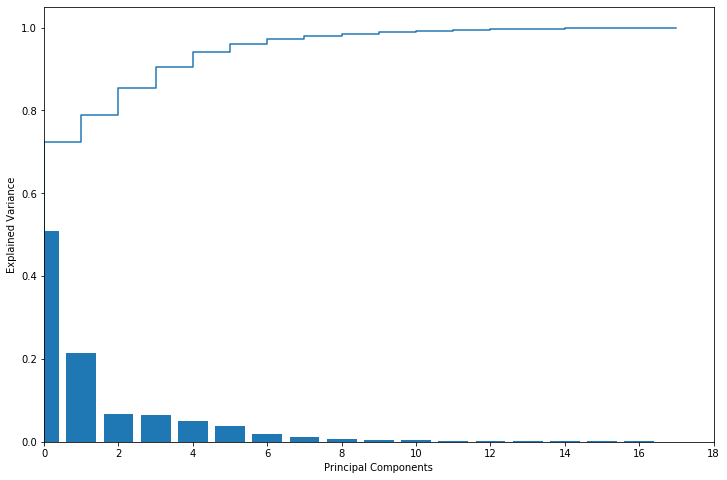

In [63]:
plt.figure(figsize = (12, 8))
plt.step(range(18), np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(18), pca.explained_variance_ratio_)
plt.xlim(0, 18)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

### Inference:
* The blue line represents component-wise explained variance while the barplots represents the cumulative explained variance.

### Applying PCA on 7 components:

In [85]:
pca_7 = PCA(n_components = 8)

X_pca = pca_7.fit_transform(X_std)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 8


In [86]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

0         1         2         3         4         5         6  \
0  0.446376 -0.475441  0.415578 -0.591180 -0.628784 -1.166228 -0.141708   
1 -0.969205 -0.247348 -0.860688  0.132533 -0.118024 -0.153620  0.121625   
2  2.471311  0.202940 -0.292011 -0.761633  0.598456 -0.485311  0.517424   
3 -0.945422 -2.161404 -0.350315 -0.148290 -0.333014  0.219506  0.096389   
4 -0.440204  1.005528  0.217450 -0.347911  0.147644 -0.579934  0.214694   

          7  
0 -0.343759  
1 -0.028565  
2  0.137581  
3 -0.207973  
4  1.081624

## 5.Classifier: SVC model with PCA


#### PCA reduced dataset with scaling:

In [87]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

### SVC model with PCA

SVC Model of dataset with PCA

Accuracy Score of Training Data:  0.8783783783783784

Accuracy Score of Test Data: 0.8858267716535433

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.82      0.90      0.86        71
           1       0.94      0.86      0.90       125
           2       0.87      0.91      0.89        58

    accuracy                           0.89       254
   macro avg       0.88      0.89      0.88       254
weighted avg       0.89      0.89      0.89       254


Mean Absolute Error of SVC:
 0.13385826771653545

Confusion Matrix of SVC:
 [[ 64   6   1]
 [ 10 108   7]
 [  4   1  53]]


(3.0, 0.0)

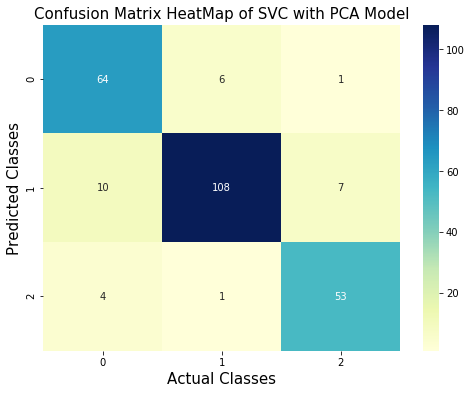

In [88]:
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)

print('SVC Model of dataset with PCA')
# fitting the model
svc_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_pca = svc_model.predict(X_te)

modeltrSVC_pca_score = svc_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_pca_score)
modelSVC_pca_score = accuracy_score(y_te, y_predictSVC_pca)
print('\nAccuracy Score of Test Data:', modelSVC_pca_score)

cfm_SVC_pca = confusion_matrix(y_te, y_predictSVC_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_pca)

#visualization of confusion matrix in the form of a heatmap
fig=plt.figure(figsize = (8, 6))
ax=sns.heatmap(cfm_SVC_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [89]:
precision_SVC_pca, recall_SVC_pca, f1_score_SVC_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_pca)
print('Recall Score :', '%0.2f' % recall_SVC_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_pca)
print('Accuracy Score :','%0.2f' % modelSVC_pca_score)

Precision Score : 0.88
Recall Score : 0.89
F1-Score : 0.88
Accuracy Score : 0.89


## 6.Conclusion:

In [90]:
modellist = []
modellist.append(['Support Vector Classifier with PCA', modeltrSVC_pca_score * 100, modelSVC_pca_score * 100, recall_SVC_pca * 100, precision_SVC_pca * 100])
modellist.append(['Support Vector Classifier without PCA', modeltrSVC_score * 100, modelSVC_score * 100, recall_SVC * 100, precision_SVC * 100])
models_df = pd.DataFrame(modellist, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
models_df

Model  Accuracy Score of Training Data  \
0     Support Vector Classifier with PCA                        87.837838   
1  Support Vector Classifier without PCA                        94.256757   

   Accuracy Score of Test Data  Recall Score  Precision Score  
0                    88.582677     89.306718        87.616524  
1                    94.488189     95.147353        93.836351

### Inference:
* The accuracy of test data has reduced by about 6% with PCA.
* Eventhough the dimentions were reduced from 18 to 8, the model with PCA fared well in terms of accuracy score. 
* Since it was a small datset the processing time was negligible in both SVC with and without PCA techniques but with reduced dimensions the SVC model with dimentional reduction will be less resource heavy.
* The increase in accuracy score of testing data is more with **PCA** as compared to jump in accuracy score of testing without PCA compared to accuracy score in training dataset. 